In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv3D, MaxPooling3D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
from keras.datasets import cifar10
import cv2

In [ ]:
#drive.mount("/content/drive", force_remount=True)
#with open("/content/drive/My Drive/Colab Notebooks/cifar-10-python.tar.gz","rb") as file:
#  images_array = pickle.load(file)

In [ ]:
#images_array = np.array(images_array)
#print(images_array.shape)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#training_set = images_array[:10000,:].astype('float32')
#training_set = training_set/255
#test_set = images_array[10000:14000,:].astype('float32')
#test_set = test_set/255
#print(training_set.shape)
#print(test_set.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

input_img = Input(shape=(32, 32, 3))
print(input_img)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)
print(encoded)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

encoder= Model(input_img, encoded)
decoder= Model(encoded, decoded)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 8), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                 

In [ ]:
#tbCallBack =TensorBoard(log_dir='./log', histogram_freq=1,write_graph=True,write_grads=True,batch_size=32,write_images=True)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=40, batch_size=64, shuffle=True, validation_data=(X_test, X_test), verbose=1)
autoencoder.save('/content/drive/My Drive/encoder_decoder.h5',include_optimizer=True)

Epoch 1/40
782/782 [==============================] - 102s 129ms/step - loss: 45.8019 - val_loss: -117.7249
Epoch 2/40
782/782 [==============================] - 101s 129ms/step - loss: -570600884641071112388608.0000 - val_loss: -4260440123368003573121024.0000
Epoch 3/40
782/782 [==============================] - 101s 129ms/step - loss: -11630877358501692312649728.0000 - val_loss: -17880450936155255911481344.0000
Epoch 4/40
782/782 [==============================] - 103s 131ms/step - loss: -23076445643567926110846976.0000 - val_loss: -28251873384259914767007744.0000
Epoch 5/40
782/782 [==============================] - 103s 132ms/step - loss: -32605846858762534166462464.0000 - val_loss: -37630922106038743908483072.0000
Epoch 6/40
782/782 [==============================] - 104s 132ms/step - loss: -42113105063539663119056896.0000 - val_loss: -47361794048320389259460608.0000
Epoch 7/40
782/782 [==============================] - 103s 131ms/step - loss: -51441249995047090752847872.0000 - va

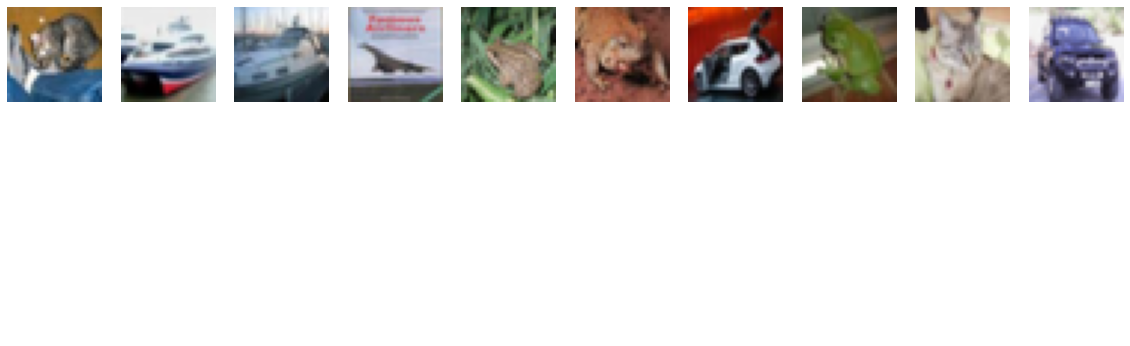

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs.shape
n = 10
plt.figure(figsize=(20, 8))
for i in range(n): # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.gray()
  ax.set_axis_off() # display reconstruction
  ax = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i])
  plt.gray()
  ax.set_axis_off()
plt.show()

(10000, 4, 4, 8)


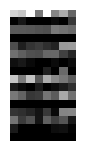

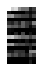

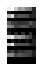

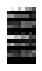

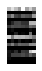

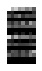

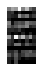

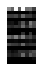

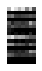

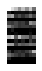

In [ ]:
# take a look at the 128-dimensional encoded representation
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)
print(encoded_imgs.shape)
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(encoded_imgs[i].reshape(8,16).T)
  plt.gray()
  ax.set_axis_off()
  plt.show()
encoder.save('/content/drive/My Drive/encoder.h5')

In [ ]:
# save latent space features 32-d vector
pickle.dump(encoded_imgs, open('/content/drive/My Drive/conv_autoe_features.pickle', 'wb'))